In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import io
plt.rcParams["font.family"]='Malgun Gothic'

In [2]:
df=pd.read_csv("bundang3years_big1.csv")
print(df.head())
print(df.shape)

             시군구           단지명  전용면적   거래금액  층  건축년도  최고층  총세대수  용적률  건폐율  \
0  경기도 성남분당구 구미동       LG트윈하우스    90  28900  6  1999    8   342  422   74   
1  경기도 성남분당구 구미동       LG트윈하우스    90  30500  5  1999    8   342  422   74   
2  경기도 성남분당구 구미동       LG트윈하우스    90  31000  8  1999    8   342  422   74   
3  경기도 성남분당구 구미동       LG트윈하우스    90  30000  3  1999    8   342  422   74   
4  경기도 성남분당구 구미동  노블빌리지(187-5)   138  53700  7  2001    8   132  288   42   

   지하철도보거리  대형병원최소거리  마트최소거리  경과년수   월  
0     0.46       2.2    0.40    21  23  
1     0.46       2.2    0.40    22  28  
2     0.46       2.2    0.40    22  31  
3     0.46       2.2    0.40    22  36  
4     0.38       1.8    0.29    19  15  
(461, 15)


In [3]:
#데이터 확인 및 필요 없는 열 삭제
#df=pd.read_csv(io.BytesIO(uploaded['bundang1.csv']),encoding='euc-kr')
#df=pd.read_csv("bundang1.csv")
pd.set_option('display.max_columns', 500)

df.drop(['시군구'],axis=1,inplace=True)
df.drop(['단지명'],axis=1,inplace=True)
df.drop(['건축년도'],axis=1,inplace=True)
# df.drop(['마트최소거리'],axis=1,inplace=True)
# df.drop(['지하철도보거리'],axis=1,inplace=True)
# df.drop(['용적률'],axis=1,inplace=True)
# df.drop(['대형병원최소거리'],axis=1,inplace=True)
#df.drop(['층'],axis=1,inplace=True)
# df.drop(['건폐율'],axis=1,inplace=True)
#df.drop(['총세대수'],axis=1,inplace=True)
# df.drop(['규모별월세가격지수'],axis=1,inplace=True)
# df.drop(['규모별수익률'],axis=1,inplace=True)
# df.drop(['동별인구수'],axis=1,inplace=True)
print(df.head())

#데이터 형태 실수로 변환
#면적 거래금액 분리버전
Y = df['거래금액'].values
Y = Y.astype('float')
X = df.drop(labels=['거래금액'],axis=1)
X = X.astype('float')

# 단위면적당 거래금액 버전
# df.drop(['전용면적'],axis=1,inplace=True)
# df.drop(['거래금액'],axis=1,inplace=True)
# Y = df['거래금액2'].values
# Y = Y.astype('float')
# X = df.drop(labels=['거래금액2'],axis=1)
# X = X.astype('float')

# 훈련셋, 시험셋 분류 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

   전용면적   거래금액  층  최고층  총세대수  용적률  건폐율  지하철도보거리  대형병원최소거리  마트최소거리  경과년수   월
0    90  28900  6    8   342  422   74     0.46       2.2    0.40    21  23
1    90  30500  5    8   342  422   74     0.46       2.2    0.40    22  28
2    90  31000  8    8   342  422   74     0.46       2.2    0.40    22  31
3    90  30000  3    8   342  422   74     0.46       2.2    0.40    22  36
4   138  53700  7    8   132  288   42     0.38       1.8    0.29    19  15


C:\Users\82102\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82102\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


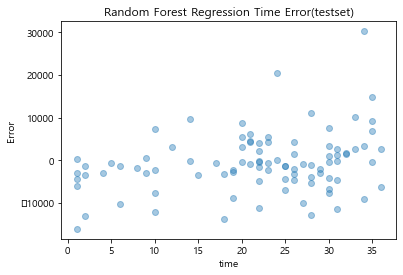

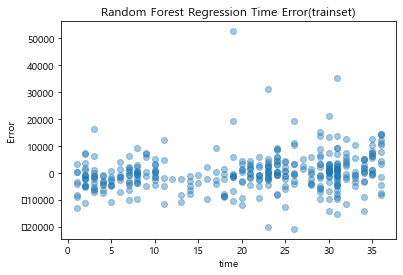

In [4]:
#랜덤포레스트회귀모델 생성 및 예측값 실제값 비교
#n_estimators = 나무의 개수 ,random_state=난수
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=10, max_depth=5)
RF_model.fit(X_train, Y_train)

#예측값 생성
RF_prediction_test = RF_model.predict(X_test)
RF_prediction_test = RF_prediction_test.astype('float')
RF_train_test = RF_model.predict(X_train)
RF_train_test = RF_train_test.astype('float')
#시간에따른 error
time = X_test['월'].values
time_train = X_train['월'].values
#time = time.astype('float')

error=Y_test-RF_prediction_test
plt.scatter(time, error, alpha=0.4)
plt.xlabel('time')
plt.ylabel('Error')
plt.title('Random Forest Regression Time Error(testset)')
plt.show()

error=Y_train-RF_train_test
plt.scatter(time_train, error, alpha=0.4)
plt.xlabel('time')
plt.ylabel('Error')
plt.title('Random Forest Regression Time Error(trainset)')
plt.show()